# Zhenfeng Liang

## I am using R version 3.2.2

# MTH9875 Homework 2

Assigned: September 3, 2015.
Due: September 17, 2015 by 6pm.

Late homework **will not be accepted**.

<font color = "red">Homework is to be done by each student individually.  To receive full credit, you must email a completed copy of this iPython notebook to Tai-Ho Wang and Jim Gatheral by the due date and time.  All R-code must run correctly and solutions must be written up neatly in Markdown/LaTeX format.

<font color="blue">If you encounter problems with Markdown/LaTeX or iPython notebook, please contact your iPython notebook ambassador.


### The  volatility smile in a simple regime-switching model

#### 1. (10 points) 

Consider the simple regime-switching model from Lecture 2 where realized volatility over a one-year period can be either $10\%$ or $30\%$, each with probability $1/2$ (depending on an initial coin toss say).  The density of 1-year returns is given by

In [1]:
d3010 <- function(x){(dnorm(x,sd=.1)+dnorm(x,sd=.3))/2}

The following snippet loads Black-Scholes functions from Lecture 1.  Please use these in your solution.

In [2]:
download.file(url="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/09/9875HW2.zip", destfile="9875HW2.zip")
unzip(zipfile="9875HW2.zip")

source("BlackScholes.R")

(a) Code a function to return the price of a 1-year European option with log-strike $k$ in this model.  Your function should return the price as a fraction of the current stock price.

(b) Code a function to return the implied volatility 1-year European option with log-strike $k$ in this model.

(c) Draw the 1-year volatility smile in this model for log-strikes from -$2.0$ to $2.0$ with implied volatility on the y-axis and log-strike on the x-axis.  

(d) What is implied volatility at-the-money?  Give intuition as to why.

(e) In the extreme wings of the volatility smile, implied volatility tends to $30\%$.  Why?

### (a)

In [3]:
CalOptionPriceLogStrike <- function(k, r, isCall=TRUE){
    # calculate the 1 year european call option price given log strike
    # Input: the log-strike - log(K/FT). r: interest rate
    # Output: the price as a fraction of the current stock price.
    
    # log return - log(ST/S0)
    ret_vec <- seq(-3.0, 3.0, 0.01)    
    prob_vec <- d3010(ret_vec)
    prob_vec_normalize <- prob_vec / sum(prob_vec) #  normalize the probability,
    # Risk neutral evaluation, one year
    if (isCall==TRUE){
        # val <- sum( max(exp(ret_vec) * exp(-r * 1) - exp(k) , 0) * prob_vec / sum(prob_vec) ) 
        val <- sum( pmax(exp(ret_vec) * exp(-r * 1) - exp(k) , 0) * prob_vec_normalize ) 
    }
    else{       
        val <- sum( pmax(exp(k) - exp(ret_vec) * exp(-r * 1), 0) * prob_vec_normalize ) 
    }
        
    return(val)
}


### (b)

In [4]:
BSImpliedVolWithLogStrike <- function(k, r, isCall = TRUE){
    # function to return the implied vol of a 1-year European option with log-strike
    # Input:
    #   k: the log-strike - log(K/FT).
    #   r: interest rate
    #   isCall: If it is a call option or put option
    # return: the implied vol.
    # Compute the call/put market price using the existing distribution
    
    price <- CalOptionPriceLogStrike(k, r, isCall)
    
    s <- 1
    T <- 1
    strike <- exp(k) * s * exp(r * T)
    
    if (isCall)
        return(BSImpliedVolCall(s, strike, T, r, price))
    else
        return(BSImpliedVolPut(s, strike, T, r, price))
}

### (c)

In [5]:
# Function to return implied vols for a range of strikes
CalImpVolVec <- function(AK, r, isCall=TRUE)
{
    # function to return the the list of implied vols of a 1-year European option with list of log-strike
    # modified from the R source code provided
    # Args:
    #   AK: vector of the log-strike - log(K/S).
    #   r: interest rate
    #   isCall: If it is a call option or put option
    # return: the list of implied vol.
    
    nK <- length(AK)
    BSV <- numeric(nK)
    for (j in 1:nK)
    {
        BSV[j] <- BSImpliedVolWithLogStrike(AK[j], r, isCall)
    }
    
    return (BSV)
}

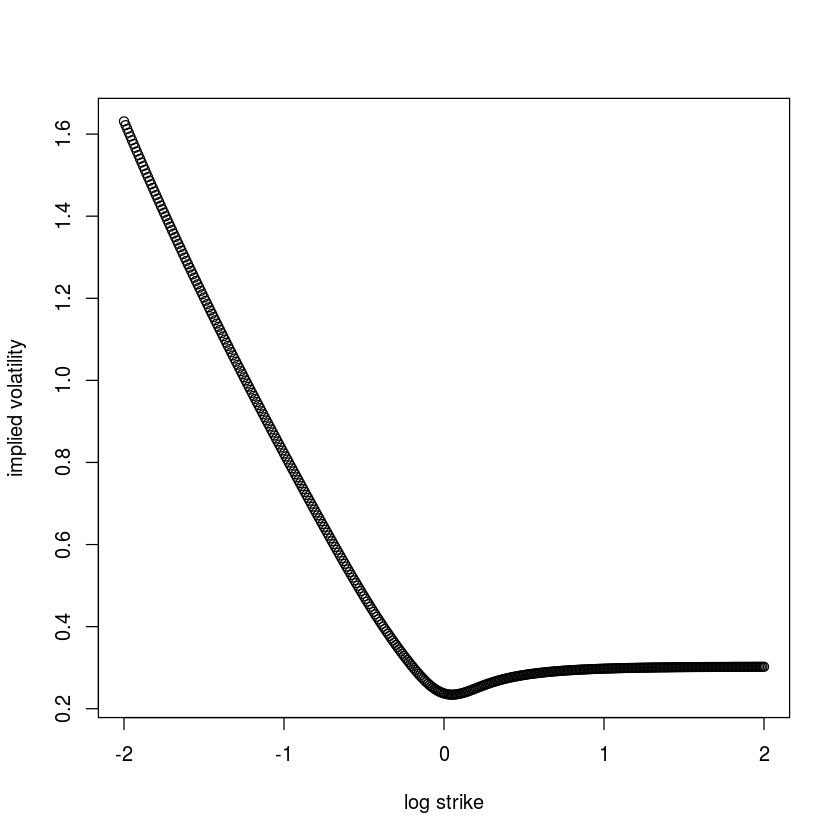

In [6]:
AK <- seq(-2.0, 2.0, 0.01) 
BSV <- CalImpVolVec(AK, 0.0)
plot(AK, BSV ,xlab="log strike" ,ylab="implied volatility")

### (d)

In [7]:
print(paste("ATM's implied volatility is", BSImpliedVolWithLogStrike(0.0, 0.0))) 

[1] "ATM's implied volatility is 0.237233428076563"


##### Intuition
When r=0, ATM means the log-skrike equals to 0, which means return is zero, at the peak of the return distribution. So we can use the total distribution's standard deviation to approximate the ATM standard deviation. 

$$\sqrt{0.5\,(0.3^2 + 0..1^2)} = 0.2236$$,

which is around the output above.

### (e)

In the extreme wing of the smile, K is much larger than S0. For call OTM option, it will have price only when it has a large volatility. And in our market price distribution, the largest standard deviation is 30%, which is around the volatility of the extreme wing of the implied volatility smile.

### Tanaka's formula
$$\newcommand{\supp}{\mathrm{supp}}
\newcommand{\EE}{\mathbb{E} }
\def\Cov{{ \mbox{Cov} }}
\def\Var{{ \mbox{Var} }}
\newcommand{\1}{\mathbf{1} }
\newcommand{\PP}{\mathbb{P} }
%\newcommand{\Pr}{\mathrm{Pr} }
\newcommand{\QQ}{\mathbb{Q} }
\newcommand{\RR}{\mathbb{R} }
\newcommand{\DD}{\mathbb{D} }
\newcommand{\HH}{\mathbb{H} }
\newcommand{\spn}{\mathrm{span} }
\newcommand{\cov}{\mathrm{cov} }
\newcommand{\sgn}{\mathrm{sgn} }
\newcommand{\HS}{\mathcal{L}_{\mathrm{HS}} }
%\newcommand{\HS}{\mathrm{HS} }
\newcommand{\trace}{\mathrm{trace} }
\newcommand{\LL}{\mathcal{L} }
%\newcommand{\LL}{\mathrm{L} }
\newcommand{\s}{\mathcal{S} }
\newcommand{\ee}{\mathcal{E} }
\newcommand{\ff}{\mathcal{F} }
\newcommand{\hh}{\mathcal{H} }
\newcommand{\bb}{\mathcal{B} }
\newcommand{\dd}{\mathcal{D} }
\newcommand{\g}{\mathcal{G} }
\newcommand{\half}{\frac{1}{2} }
\newcommand{\T}{\mathcal{T} }
\newcommand{\bi}{\begin{itemize}}
\newcommand{\ei}{\end{itemize}}
\newcommand{\beq}{\begin{equation}}
\newcommand{\eeq}{\end{equation}}
\newcommand{\beas}{\begin{eqnarray*}}
\newcommand{\eeas}{\end{eqnarray*}}
$$
#### 2. (8 points)

By applying Itô's lemma as in the notes, prove Tanaka's formula in its usual form:

$$
\left|B_t\right|=\int_0^t\,\sgn(B_s)\,dB_s+L_t
$$
where $B_t$ is a standard Brownian motion, $\sgn$ denotes the sign function

$$
\sgn(x)=\left\{
\begin{array}{ll}
  +1&x \ge 0  \\
 -1 & x <0 
\end{array}
\right.
$$

and $L_t$ is its local time at $0$ (roughly the time spent by $B$ at $0$ before time $t$) given by the formal expression

$$
L_t=\int_0^t\,\delta(B_s)\,ds.
$$

Explain in words what this result means in terms of delta-hedging of a particular options position.


### Solution:

We have:
$$\left|B_t\right| = (B_t)^{+} + (-B_t)^{+}$$ 

Apply Ito as the note, we have the following:

$$
d(B_t)^{+} = \theta(B_t)dB_t + \frac{1}{2}\delta(B_t)dt
$$

Substitute $(-B_t)^{+}$ into the above formula, using the fact that delta function is even, we have:

$$
d(-B_t)^{+} = -\theta(-B_t)dB_t + \frac{1}{2}\delta(-B_t)dt = -\theta(-B_t)dB_t + \frac{1}{2}\delta(B_t)dt
$$

Plug them together:
\begin{eqnarray}
d(\left|B_t\right|) &=& d((B_t)^{+} + (-B_t)^{+}) \\
                    &=& (\theta(B_t) - \theta(-B_t))dB_t + \delta(B_t)dt \\
                    &=& sgn(B_t)dB_t + \delta(B_t)dt
\end{eqnarray}

Then we can just integrate the both sides equations, 
$$
\left|B_t\right|=\int_0^t\,\sgn(B_s)\,dB_s+L_t
$$

This formula express payoff of a straddle. If you short a straddle, in order to delta hedge your position, when $B_t > 0$ and $sgn(B_t) = 1$, you need to long a call. Similarly, for $B_t < 0$, $sgn(B_t)$ also shows the direction to hedge your position.

## Local volatility and implied volatility

#### 3. (6 points) 

Using the BBF formula, prove the well-known rule of thumb that the local volatility skew is roughly twice the implied volatility skew for short expirations.  Formally, for small $T$,

$$
\left.\partial_k \sigma(k,T)\right|_{k=0} \approx 2\, \left.\partial_k \sigma_{BS}(k,T)\right|_{k=0}.
$$


BBF formular:

$$\sigma_{BS}(k, T)=\frac{k}{\int_0^k\,\frac{dy}{\sigma(y,T)}}$$

Take derivative with respect to $k$, with some rearrangement,

\begin{eqnarray}
\partial_{k}\,\sigma_{BS}(k, T) = \frac{\int_0^k\,\frac{dy}{\sigma(y,T)} - \frac{k}{\sigma(k, T)}}{ (\int_0^k\,\frac{dy}{\sigma(y,T)})^2}
\end{eqnarray}

As we are talking about the relationship between local volatility skew and implied volatility skew for short expirations, we let take the limit, $k \rightarrow 0$ 

Apply L'Hopital twice, we have, 

\begin{eqnarray}
&&\lim_{k \rightarrow 0}\frac{\int_0^k\,\frac{dy}{\sigma(y,T)} - \frac{k}{\sigma(k, T)}}{ (\int_0^k\,\frac{dy}{\sigma(y,T)})^2}\\
&=& \lim_{k \rightarrow 0}\frac{\frac{1}{\sigma(k, T)} - \frac{1}{\sigma(k, T)} + \frac{k\partial_k\sigma(k, T)}{\sigma(k, T)^2}}{2\,\int_0^k\,\frac{dy}{\sigma(y,T)}\frac{1}{\sigma(k, T)}} \quad \\
&=& \lim_{k \rightarrow 0}\frac{\frac{\partial_k\sigma(k, T))}{\sigma(k, T)}+ k\,g(\sigma(k, T))}{2\,\frac{1}{\sigma(k, T)}}\quad \text{(g is some kind of function, the explict expression doesn't matter here)}\\
&=& \frac{\partial_k\sigma(k, T)}{2}
\end{eqnarray}

Therefore, Q.E.D

#### 4. (6 points) 

Consider formula (12) from Lecture 2:

$$
v_L(k,T) = \frac{\frac{\partial w}{\partial T}}
{\left(1 -\frac 12\frac{k}{w}\,\frac{\partial w}{\partial k}\right)^2
 - \frac14\,\left( \frac{1}{4} + \frac{1}{w} \right)\,
 \left( \frac{\partial w}{\partial k} \right)^2  +
\frac{1}{2}\,\frac{\partial^2 w}{\partial k^2 }}.
%\label{eq:localfromimplied}
$$

Using this formula, show that the simple quadratic parameterization

$$
w(k,T)=\alpha(T)+\beta(T)\,{k}+\gamma(T)\,{k^2}
$$

with $\alpha(T)>0$ and $\gamma(T)>0$ is arbitrageable.  Explain your result in words in terms of option strategies.

### Solution:

If BS implied variance is the quardratic parameterization form as above, the first and second derivatives $wrt$ $k$ will looks like these,
$$
\frac{\partial w}{\partial k} =  \beta(T) + 2k \gamma(T) \\
\frac{\partial^2 w}{\partial{k}^2} =  2\gamma(T)
$$

So, we plug them into the denominator formula,
$$
\left(1 -\frac 12\frac{k}{w}\,\frac{\partial w}{\partial k}\right)^2
 - \frac14\,\left( \frac{1}{4} + \frac{1}{w} \right)\,
 \left( \frac{\partial w}{\partial k} \right)^2  +
\frac{1}{2}\,\frac{\partial^2 w}{\partial k^2 }
$$

With some dirty algebra calculation, we have,

\begin{eqnarray}
&&\left(1 -\frac 12\frac{k}{w}\,\frac{\partial w}{\partial k}\right)^2
 - \frac14\,\left( \frac{1}{4} + \frac{1}{w} \right)\,
 \left( \frac{\partial w}{\partial k} \right)^2  +
\frac{1}{2}\,\frac{\partial^2 w}{\partial k^2 } \\
&=& - \frac1{16}\left( \beta(T)^2 + 4\,\gamma(T)\,k + 4\,\gamma^2 k^2 \right) + (\frac{2\,\alpha + \beta\,k}{2(\alpha(T)+\beta(T)\,{k}+\gamma(T)\,{k^2})})^2  - \frac1{4\,w}\left( \beta(T)^2 + 4\,\gamma(T)\,k + 4\,\gamma^2 k^2 \right) + \gamma(T)
\end{eqnarray}

Looking at the above formula, we know leading order in $w$ is $k^2$, then the $k^2$ order in the third term of this formula will cancel out. So, when $k$ becomes relatively large, we can rewrite the above formula as follow:

\begin{eqnarray}
&&\left(1 -\frac 12\frac{k}{w}\,\frac{\partial w}{\partial k}\right)^2
 - \frac14\,\left( \frac{1}{4} + \frac{1}{w} \right)\,
 \left( \frac{\partial w}{\partial k} \right)^2  +
\frac{1}{2}\,\frac{\partial^2 w}{\partial k^2 } \\
&=& - \frac1{16}\left(  4\,\gamma^2 k^2 \right) + \mathcal{O}(k)
\end{eqnarray}

which is negative. 

Because the local variance have to be positive, so the $\frac{\partial w}{\partial T} < 0$.

In this situation, volatility will go down as time $T$, so the price of the option will decrease as maturity $T$ becomes larger, i.e. $\frac{\partial C}{\partial T} < 0$, which will lead to a calendar spread arbitrage.